In [97]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [98]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [99]:
X_train.shape

(50000, 32, 32, 3)

In [100]:
X_test.shape

(10000, 32, 32, 3)

In [101]:
y_train.shape

(50000, 1)

In [102]:
y_train = y_train.reshape(-1,)
y_train[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

In [103]:
y_test = y_test.reshape(-1,)

In [104]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [105]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y[index]])

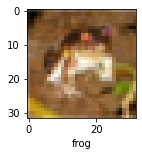

In [106]:
plot_sample(X_train, y_train, 0)

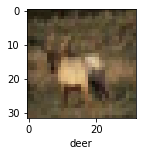

In [107]:
plot_sample(X_train, y_train, 3)

In [108]:
X_train = X_train/255
X_test = X_test/255

In [109]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)


Epoch 1/5
1563/1563 [==============================] - 13s 8ms/step - loss: 1.8140 - accuracy: 0.3524
Epoch 2/5
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6268 - accuracy: 0.4246
Epoch 3/5
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5441 - accuracy: 0.4548
Epoch 4/5
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4837 - accuracy: 0.4746
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4334 - accuracy: 0.4951


In [110]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.32      0.44      1000
           1       0.62      0.61      0.61      1000
           2       0.39      0.35      0.37      1000
           3       0.39      0.22      0.28      1000
           4       0.62      0.20      0.31      1000
           5       0.35      0.46      0.40      1000
           6       0.52      0.53      0.53      1000
           7       0.38      0.74      0.50      1000
           8       0.50      0.73      0.59      1000
           9       0.55      0.58      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



In [111]:
# cnn = models.Sequential([
#     layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
#     layers.MaxPool2D(pool_size=(2,2)),

#     layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
#     layers.MaxPool2D(pool_size=(2,2)),

#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     # layers.Dense(32, activation='relu'),
#     layers.Dense(10, activation='softmax')
# ])


In [112]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [113]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [114]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4772 - accuracy: 0.4711
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1336 - accuracy: 0.6016
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0021 - accuracy: 0.6497
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9185 - accuracy: 0.6820
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8533 - accuracy: 0.7040
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7982 - accuracy: 0.7219
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7542 - accuracy: 0.7383
Epoch 8/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7142 - accuracy: 0.7503
Epoch 9/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6780 - accuracy: 0.7634
Epoch 10/10
1563/1563 [==============================] - 11s 7ms/step - l

In [115]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.9376 - accuracy: 0.6884


[0.9376001954078674, 0.6883999705314636]

In [116]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.02936511e-02, 1.33974385e-03, 2.57449467e-02, 6.80899918e-01,
        1.78457284e-03, 1.12899914e-01, 8.24023690e-03, 2.84875603e-03,
        1.45416260e-01, 5.31938625e-04],
       [1.24688679e-02, 5.38309477e-02, 8.35552328e-06, 1.96874225e-06,
        2.44233661e-07, 3.98730933e-08, 5.09195388e-08, 2.07759444e-06,
        9.28326190e-01, 5.36128413e-03],
       [7.23904148e-02, 1.12960234e-01, 2.18636869e-03, 4.43644542e-03,
        2.77162733e-04, 1.77754977e-04, 7.54884677e-05, 1.17847917e-03,
        7.87953794e-01, 1.83639042e-02],
       [8.98874402e-01, 1.58941303e-03, 1.24896839e-02, 9.36398841e-03,
        4.26773764e-02, 5.31502184e-04, 3.06713954e-03, 1.09282104e-04,
        3.09903380e-02, 3.06858623e-04],
       [1.74390550e-07, 1.30473190e-05, 2.83855642e-03, 8.79495218e-03,
        2.00127408e-01, 4.43993777e-04, 7.87708580e-01, 9.74446357e-06,
        5.46633855e-05, 8.95335324e-06]], dtype=float32)

In [117]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [118]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

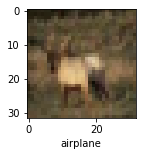

In [119]:
plot_sample(X_test, y_test,3)

In [120]:
classes[y_classes[3]]

'airplane'